# README.md
Build some initial statistics

1) What are the enrichments from the notes? 
2) How many pts don’t have a start date? End date? How many are overlapped? And for each drug?
3) Run through the pipeline to get the start and end date distribution, and duration
4) Validate by manual chart reviews for 15 random pts (computational vs manual)

# Step1, read from spreadsheet, clean up, and get statistics

In [44]:
import numpy as np
import pandas as pd
import sys, getopt
import csv
from datetime import datetime
import itertools

from matplotlib import pyplot
from pylab import *
import matplotlib.pyplot as plt

%matplotlib inline  
import seaborn as sns

In [45]:
df1=pd.read_excel("large_tableA.xls", header=0)
df1.fillna('', inplace=True)

In [46]:
index_list=df1.columns
index_list

Index(['person_id', 'cancer_drug', 'category', 'start_date_source',
       'start_date_note_id', 'start_date_note_date', 'start_date_sent_id',
       'start_date_evidence', 'start_date_matched_text', 'start_date_year',
       'start_date_month', 'start_date_day', 'end_date_source',
       'end_date_note_id', 'end_date_note_date', 'end_date_sent_id',
       'end_date_evidence', 'end_date_matched_text', 'end_date_year',
       'end_date_month', 'end_date_day', 'first_mentioned_note_id',
       'first_mentioned_note_date', 'first_mentioned_evidence',
       'first_mentioned_matched_text', 'last_mentioned_note_id',
       'last_mentioned_note_date', 'last_mentioned_evidence',
       'last_mentioned_text'],
      dtype='object')

In [47]:
#delete empty columns

print(df1.shape)
del_col=['category',
       'start_date_note_id', 'start_date_note_date', 'start_date_sent_id',
       'start_date_evidence', 'start_date_matched_text', 
       'end_date_note_id', 'end_date_note_date', 'end_date_sent_id',
       'end_date_evidence', 'end_date_matched_text', 'first_mentioned_note_id',
       'first_mentioned_note_date', 'first_mentioned_evidence',
       'first_mentioned_matched_text', 'last_mentioned_note_id',
       'last_mentioned_note_date', 'last_mentioned_evidence',
       'last_mentioned_text']

for col in del_col:
    del df1[col]
print(df1.shape)

(2015, 29)
(2015, 10)


In [48]:
df1[:15]

,person_id,cancer_drug,start_date_source,start_date_year,start_date_month,start_date_day,end_date_source,end_date_year,end_date_month,end_date_day
0,2,Leuprolide,Notes,2009,2,26,MedTable,2017,2,1
1,12,Leuprolide,MedTable,2013,5,6,,,,
2,13,Leuprolide,MedTable,2010,9,9,MedTable,2018,5,17
3,13,Degarelix,,,,,,,,
4,13,Goserelin,MedTable,2010,6,17,MedTable,2012,8,30
5,18,Goserelin,MedTable,2013,12,9,MedTable,2014,3,13
6,18,Degarelix,MedTable,2013,11,12,,,,
7,22,Leuprolide,Notes,2010,9,27,MedTable,2017,4,24
8,25,Leuprolide,MedTable,2013,11,12,MedTable,2014,2,18
9,26,Leuprolide,Notes,2014,11,26,Notes,2016,6,


In [49]:
df2=df1

# Research question: What's the enrichment to MedTable from the Notes for each drug? 
For the start and end date? How many have missing values?     

In [50]:
start_note_list=[]
start_med_list=[]

end_note_list=[]
end_med_list=[]

for ind in df1.index:
 
    if (df1['start_date_source'][ind]=='Notes'): 
        start_note_list.append(ind)  
    if (df1['start_date_source'][ind]=='MedTable'): 
        start_med_list.append(ind)     
        
    if (df1['end_date_source'][ind]=='Notes'): 
        end_note_list.append(ind)  
    if (df1['end_date_source'][ind]=='MedTable'): 
        end_med_list.append(ind)     

print("start_note ", len(start_note_list))
print("start_med ", len(start_med_list))
print("start_nan ", df1['start_date_source'].isnull().sum())
print("total_start", len(start_note_list)+len(start_med_list)+df1['start_date_source'].isnull().sum())
print(" ")
print("end_note ", len(end_note_list))
print("end_med ", len(end_med_list))
print("end_nan ", df1['end_date_source'].isnull().sum())
print("total_end", len(end_note_list)+len(end_med_list)+df1['end_date_source'].isnull().sum())

start_note  877
start_med  681
start_nan  0
total_start 1558
 
end_note  307
end_med  879
end_nan  0
total_end 1186


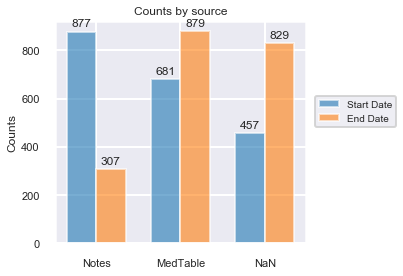

In [51]:
labels = ['Notes', 'MedTable', 'NaN']
start_counts = [877, 681, 457]
end_counts = [307, 879, 829]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
sns.set_context("poster", font_scale=0.5, rc={"lines.linewidth": 2})
sns.set_style("darkgrid")
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, start_counts, width, label='Start Date', alpha=0.6)
rects2 = ax.bar(x + width/2, end_counts, width, label='End Date', alpha=0.6)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Counts by source')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=1, bbox_to_anchor=(1.2, 0.5),loc='lower center', fontsize='small')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

In [52]:
#how many lines that have both start and end date as nan?
#these correspond to how many patients?

df1_start_null=df1[df1['start_date_source'].isnull()]
df1_end_null=df1[df1['end_date_source'].isnull()]

#group to pt level
df2_start=df1_start_null.groupby(["person_id"]).size().reset_index(name='counts')
df2_end=df1_end_null.groupby(["person_id"]).size().reset_index(name='counts')

In [53]:
df1_start_null

,person_id,cancer_drug,start_date_source,start_date_year,start_date_month,start_date_day,end_date_source,end_date_year,end_date_month,end_date_day


In [54]:
df2_start

,person_id,counts


In [55]:
df2_start

,person_id,counts


In [56]:
print("# of lines with start date empty: ", shape(df1_start_null)[0])
print("# of lines with end date empty: ", shape(df1_end_null)[0])

# of lines with start date empty:  0
# of lines with end date empty:  0


In [57]:
list_pts_start_empty=df2_start["person_id"].to_list()
print(len(list_pts_start_empty))
list_pts_end_empty=df2_end["person_id"].to_list()
print(len(list_pts_end_empty))

0
0


In [58]:
test1=[x for x in list_pts_start_empty if x in list_pts_end_empty]
print("# of pts that have no start nor end :",len(test1))
test2=[x for x in list_pts_start_empty if x not in list_pts_end_empty]
print("# of pts that no start but with end :",len(test2))
test3=[x for x in list_pts_end_empty if x not in list_pts_start_empty]
print("# of pts that have start but not end :",len(test3))

#list_pts_bothdates_empty=set(list_pts_start_empty).intersection(list_pts_end_empty)
#print("number of pts with both start and end empty: ", len(list_pts_bothdates_empty))

# of pts that have no start nor end : 0
# of pts that no start but with end : 0
# of pts that have start but not end : 0


In [59]:
ADT_lib=["Leuprolide","Degarelix","Goserelin","Triptorelin","Histrelin"]

In [60]:
df_startmed_group=df1.groupby(["cancer_drug","start_date_source"]).size() 
df_startmed_group

cancer_drug  start_date_source
Degarelix                         100
             MedTable              97
             Notes                245
Goserelin                          41
             MedTable              87
             Notes                 41
Histrelin                           6
             MedTable               1
             Notes                  1
Leuprolide                        289
             MedTable             486
             Notes                576
Triptorelin                        21
             MedTable              10
             Notes                 14
dtype: int64

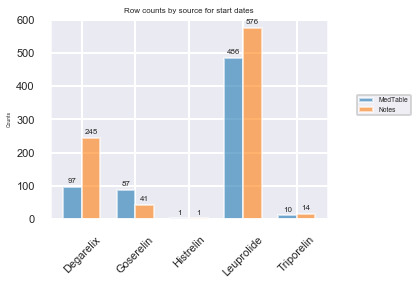

In [61]:
labels =["Degarelix","Goserelin","Histrelin","Leuprolide","Triporelin"]
start_med = [97,87,1,486,10]
start_note = [245,41,1,576,14]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
sns.set_context("poster", font_scale=0.5, rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5,"lines.linewidth": 2})
sns.set_style("darkgrid")
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, start_med, width, label='MedTable', alpha=0.6)
rects2 = ax.bar(x + width/2, start_note, width, label='Notes', alpha=0.6)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Row counts by source for start dates')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=45)
ax.legend(ncol=1, bbox_to_anchor=(1.2, 0.5),loc='lower center', fontsize='small')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

(<Figure size 662.4x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fca80cbb550>)

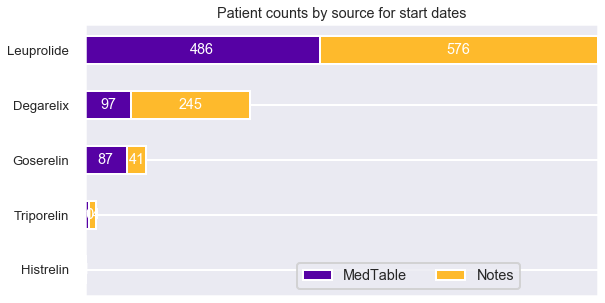

In [62]:
category_names = ['MedTable', 'Notes']
results = {
    "Leuprolide": [486,576],
    "Degarelix": [97, 245],
    "Goserelin": [87,41],
    "Triporelin": [10,14],
    "Histrelin": [1,1]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('plasma')(
        np.linspace(0.15, 0.85, data.shape[1]))

    sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    ax.set_title('Patient counts by source for start dates')
    
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0.4, 0),
              loc='lower left', fontsize='medium')

    return fig, ax


survey(results, category_names)

In [63]:
df_endmed_group=df1.groupby(["cancer_drug","end_date_source"]).size() 
#.reset_index(name='counts')
df_endmed_group

cancer_drug  end_date_source
Degarelix                       242
             MedTable           112
             Notes               88
Goserelin                        65
             MedTable            79
             Notes               25
Histrelin                         8
Leuprolide                      483
             MedTable           682
             Notes              186
Triptorelin                      31
             MedTable             6
             Notes                8
dtype: int64

In [64]:
df_endmed_group=df1.groupby(["end_date_source"]).size() 
#.reset_index(name='counts')
df_endmed_group

end_date_source
            829
MedTable    879
Notes       307
dtype: int64

In [65]:
dfend_med=df1[(df1["end_date_source"] == "MedTable")]
dfend_pt_med=dfend_med.groupby(["person_id"]).size().reset_index(name='counts')
print(len(dfend_pt_med))

dfend_notes=df1[(df1["end_date_source"] == "Notes")]
dfend_pt_notes=dfend_notes.groupby(["person_id"]).size().reset_index(name='counts')
print(len(dfend_pt_notes))

813
291


In [66]:
dfstart_med=df1[(df1["start_date_source"] == "MedTable")]
dfstart_pt_med=dfstart_med.groupby(["person_id"]).size().reset_index(name='counts')
print(len(dfstart_pt_med))

dfstart_notes=df1[(df1["start_date_source"] == "Notes")]
dfstart_pt_notes=dfstart_notes.groupby(["person_id"]).size().reset_index(name='counts')
print(len(dfstart_pt_notes))

614
733


In [67]:
#for the end date:
#patient count for the end dates 

list_start_med_pts=dfstart_pt_med["person_id"].to_list()
print(len(list_start_med_pts))

list_start_notes_pts=dfstart_pt_notes["person_id"].to_list()
print(len(list_start_notes_pts))

614
733


In [68]:
temp1 = [item for item in list_med_pts if item not in list_notes_pts]
print(len(temp1))
temp2 = [item for item in list_notes_pts if item not in list_med_pts]
print(len(temp2))

temp3 = [item for item in list_notes_pts if item in  list_med_pts]
print(len(temp3))
temp4 = [item for item in list_med_pts if item in list_notes_pts ]
print(len(temp4))

NameError: name 'list_med_pts' is not defined

In [ ]:
list_med_pts=df_med["person_id"].to_list()
print(len(list_med_pts))

list_notes_pts=df_notes["person_id"].to_list()
print(len(list_notes_pts))

In [ ]:
#build sub dataframe to get the infor on the pt level
df_med=df1[(df1["end_date_source"] == "MedTable")]

df_med1=df_med[(df_med["cancer_drug"]=="Degarelix")]
df_med2=df_med[(df_med["cancer_drug"]=="Goserelin")]
df_med3=df_med[(df_med["cancer_drug"]=="Histrelin")]
df_med4=df_med[(df_med["cancer_drug"]=="Leuprolide")]
df_med5=df_med[(df_med["cancer_drug"]=="Triptorelin")]

In [ ]:
df_pt_med1=df_med1.groupby(["person_id"]).size().reset_index(name='counts')
print(len(df_pt_med1))
df_pt_med2=df_med2.groupby(["person_id"]).size().reset_index(name='counts')
print(len(df_pt_med2))
df_pt_med3=df_med3.groupby(["person_id"]).size().reset_index(name='counts')
print(len(df_pt_med3))
df_pt_med4=df_med4.groupby(["person_id"]).size().reset_index(name='counts')
print(len(df_pt_med4))
df_pt_med5=df_med5.groupby(["person_id"]).size().reset_index(name='counts')
print(len(df_pt_med5))

In [ ]:
df_pt_med2=df_med2.groupby(["person_id"]).size().reset_index(name='counts')
print(df_pt_med1["counts"].max())
print(df_pt_med2["counts"].max())
print(df_pt_med3["counts"].max())
print(df_pt_med4["counts"].max())
print(df_pt_med5["counts"].max())

In [ ]:
#build sub dataframe to get the infor on the pt level
df_notes=df1[(df1["end_date_source"] == "Notes")]

df_notes1=df_notes[(df_notes["cancer_drug"]=="Degarelix")]
df_notes2=df_notes[(df_notes["cancer_drug"]=="Goserelin")]
df_notes3=df_notes[(df_notes["cancer_drug"]=="Histrelin")]
df_notes4=df_notes[(df_notes["cancer_drug"]=="Leuprolide")]
df_notes5=df_notes[(df_notes["cancer_drug"]=="Triptorelin")]

df_pt_notes1=df_notes1.groupby(["person_id"]).size().reset_index(name='counts')
print(len(df_pt_notes1))
df_pt_notes2=df_notes2.groupby(["person_id"]).size().reset_index(name='counts')
print(len(df_pt_notes2))
df_pt_notes3=df_notes3.groupby(["person_id"]).size().reset_index(name='counts')
print(len(df_pt_notes3))
df_pt_notes4=df_notes4.groupby(["person_id"]).size().reset_index(name='counts')
print(len(df_pt_notes4))
df_pt_notes5=df_notes5.groupby(["person_id"]).size().reset_index(name='counts')
print(len(df_pt_notes5))
print("")
print(df_pt_notes1["counts"].max())
print(df_pt_notes2["counts"].max())
print(df_pt_notes3["counts"].max())
print(df_pt_notes4["counts"].max())
print(df_pt_notes5["counts"].max())

In [ ]:
df_notes=df1[(df1["end_date_source"] == "Notes")]

In [ ]:
df_endmed_group=df_med.groupby(["cancer_drug","person_id"]).size()

In [ ]:
df_endmed_group

In [ ]:
#plot row counts chart for end date grouped by drugs

labels =["Degarelix","Goserelin","Histrelin","Leuprolide","Triporelin"]
end_med = [112,79,0,682,6]
end_note = [88,25,0,186,8]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
sns.set_style("darkgrid")
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, end_med, width, label='MedTable', alpha=0.6)
rects2 = ax.bar(x + width/2, end_note, width, label='Notes', alpha=0.6)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Row counts by source for end dates')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(ncol=1, bbox_to_anchor=(1.2, 0.5),loc='lower center', fontsize='small')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

In [ ]:
category_names = ['MedTable', 'Notes']
results = {
    "Leuprolide": [682,186],
    "Degarelix": [112,88],
    "Goserelin": [79,25],
    "Triporelin": [6,8],
    "Histrelin": [0,0]
}

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('plasma')(
        np.linspace(0.15, 0.85, data.shape[1]))

    sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    ax.set_title('Patient counts by source for end dates')

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0.4, 0),
              loc='lower left', fontsize='medium')

    return fig, ax


survey(results, category_names)

# Get data into shape and run through the Step B pipeline

In [ ]:
##step 3.1. combine year, month and day into date and convert into python datetime format
## step 3.2. make sure they take nan or blank lines
## step 3.3. groupby person id
df2[:5]

In [ ]:
df2['start_date_source'].replace('', np.nan, inplace=True)
df2['start_date_year'].replace('', np.nan, inplace=True)
df2['start_date_month'].replace('', np.nan, inplace=True)
df2['start_date_day'].replace('', np.nan, inplace=True)

df2['end_date_source'].replace('', np.nan, inplace=True)
df2['end_date_year'].replace('', np.nan, inplace=True)
df2['end_date_month'].replace('', np.nan, inplace=True)
df2['end_date_day'].replace('', np.nan, inplace=True)

In [ ]:
dftest=df2

In [ ]:
dftest=df2
dftest["start_date"]=pd.to_datetime((dftest.start_date_year*10000 + dftest.start_date_month*100+dftest.start_date_day).apply(str),format='%Y%m%d')
dftest["end_date"]=pd.to_datetime((dftest.end_date_year*10000 + dftest.end_date_month*100+dftest.end_date_day).apply(str),format='%Y%m%d')

In [ ]:
#define a subtable 
df3=dftest[['person_id', 'cancer_drug', 'start_date', 'end_date']]

In [ ]:
y=13
df_pt=df3[(dftest_sel["person_id"] == y)]
df_pt

In [ ]:
#df4 is a groupby person_id table
df4=df3.groupby(["person_id"]).size().reset_index(name='counts')

In [ ]:
df4["counts"].max()
df4[(df4["counts"] == 4)]

In [ ]:
df4

In [ ]:
#get the list of pt ids
list_pts=df4["person_id"].to_list()
list_pts
print("number of patients is:")
len(list_pts)

In [ ]:
df3[:10]

In [ ]:
df_ptcheck=df3[(df3["person_id"] == 9533)]
df_ptcheck

In [ ]:
list_pts

In [ ]:
result_list=[]

for y in list_pts:      
#for y in [2,12,13,18,22]:
#for y in [12,13]:

    #subset the dataframe to each pt
    #get start dates and end dates to lists
    df_pt=df3[(df3["person_id"] == y)]
    
    each_pt_drug_start = df_pt['start_date'].to_list()
    each_pt_drug_end = df_pt['end_date'].to_list()

    ##get rid of nan
    cleaned_a=[]
    cleaned_a= [x for x in each_pt_drug_start if str(x) != 'NaN']
    cleaned_aa= [x for x in cleaned_a if str(x) != 'nan']
    cleaned_aaa= [x for x in cleaned_aa if str(x) != 'NaT']
    cleaned_b=[]
    cleaned_b= [x for x in each_pt_drug_end if str(x) != 'NaN']
    cleaned_bb= [x for x in cleaned_b if str(x) != 'nan']
    cleaned_bbb= [x for x in cleaned_bb if str(x) != 'NaT']

    ##get the date format right
    #startdatebin=[datetime.fromisoformat(str(x)) for x in cleaned_aa]
    #enddatebin=[datetime.fromisoformat(str(x)) for x in cleaned_bb]

    #sort 
    start_sorted_bin=sorted(cleaned_aaa)
    end_sorted_bin=sorted(cleaned_bbb)
    
    start_with_2round=[]
    start_with_1round=[]
    
    if(len(start_sorted_bin)==0):
        startdate='NaN'  
        
    if(len(start_sorted_bin)>0):
        a=start_sorted_bin[0]
        
        for b in start_sorted_bin:
        #find all adt starting dates after 6months of inital starting    
            if float(abs(a-b).days)>182.5:
                start_with_2round.append(a)
                start_with_2round.append(b)
            else:
                start_with_1round.append(a) 
        #cleanup 
        start_with_2round=start_with_2round[:2]

        #get rid of repeated capturing for one round
        cleanlist = []
        for i in start_with_1round:
            if i not in cleanlist:
                cleanlist.append(i)
        start_with_1round=cleanlist
        #print(cleanlist)
        enddateall=[]

    if len(end_sorted_bin)==0:
        enddate='NaN'
        if(len(start_sorted_bin)==0):
            startdate='NaN' 
        if(len(start_sorted_bin)>0):    
            startdate=start_with_1round[0]
        
    if len(end_sorted_bin)>0:
        for i in end_sorted_bin:
        #at least two rounds of ADTs
            if len(start_with_2round)==2:
                if(i>=sorted(start_with_2round)[0]) and (i<=sorted(start_with_2round)[1]):
                    startdate=sorted(start_with_2round)[0]
                    enddateall.append(i)
                    #print(enddateall)
                #pick the one that is most close to the 2nd adt starting date
                    if len(enddateall) == 0:
                        enddate='NaN' 
                    else:
                        enddate=enddateall[-1]

                if(i>sorted(start_with_2round)[0]) and (i>sorted(start_with_2round)[1]) and (len(enddateall) == 0):
                    startdate=sorted(start_with_2round)[0]
                    enddate='NaN'
                    #leave it as empty
        
        #only one round           
            if (len(start_with_2round)<2) and (len(start_with_1round)==1):
                if(i>=sorted(start_with_1round)[0]):
                    startdate=start_with_1round[0]
                    enddateall.append(i)
                    if len(enddateall) == 0:
                        enddate='NaN' 
                    else:
                        enddate=enddateall[-1]
                           
    print(y, startdate, enddate)
    result_per_pt=[y,startdate, enddate]
    result_list.append(result_per_pt)

In [ ]:
df_results=pd.DataFrame(result_list)
df_results.columns=(['person_id', 'inital_ADT_start_date', 'inital_ADT_end_date'])
#create a column for the time window 
df_results['Inital_ADT_timewindow'] = df_results['inital_ADT_end_date'] - df_results['inital_ADT_start_date']
#create a column for the inital adt use window as days
df_results['Inital_ADT_time_window_days']=df_results['Inital_ADT_timewindow'].dt.days

In [ ]:
df_results
df_results['index1'] = df_results.index
df_results

In [ ]:
## sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 2})
binsize=180

bins=np.arange(0, 1500, binsize)
fig, ax = plt.subplots(figsize = (8,5))

#n=df_results['Inital_ADT_time_window_days'].plot(kind = "hist", bins=bins, color="purple", alpha=0.5)
(n, bins, patches) = plt.hist(df_results['Inital_ADT_time_window_days'], bins=bins,color="green", alpha=0.4)

#decorate
plt.title("Bin Size="+ str(binsize) +" days")
plt.xlabel("Days", fontsize=20, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=20,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 1501, 180))
ax.set_xticklabels(np.arange(0, 1501, 180))

# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()

In [ ]:
## sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 2})
binsize=180

bins=np.arange(0, 1500, binsize)
fig, ax = plt.subplots(figsize = (8,5))

#n=df_results['Inital_ADT_time_window_days'].plot(kind = "hist", bins=bins, color="purple", alpha=0.5)
(n, bins, patches) = plt.hist(df_results['Inital_ADT_time_window_days'], bins=bins,color="green", alpha=0.4)

#decorate
plt.title("Bin Size="+ str(int(binsize/30)) +" months")
plt.xlabel("Months", fontsize=20, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=20,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 1501, 180))
ax.set_xticklabels(np.arange(0, 50, 6))

# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()

In [ ]:
#pt statistics

df_start_empty=df_results[df_results.inital_ADT_start_date.isnull()]
df_end_empty=df_results[df_results.inital_ADT_end_date.isnull()]
df_both_empty1=df_results[df_results.inital_ADT_end_date.isnull()][df_results.inital_ADT_start_date.isnull()]
#df_onlystartempty=df_results[df_results.inital_ADT_start_date.isnull()][df_results.inital_ADT_end_date.notnull()]
#df_onlyendempty=df_results[df_results.inital_ADT_end_date.isnull()][df_results.inital_ADT_start_date.notnull()]
df_both=df_results[df_results.inital_ADT_end_date.notnull()][df_results.inital_ADT_start_date.notnull()]
#df_ADT_window_zero=df_results[df_results.Inital_ADT_time_window_days==0]

print("Number of pts with start dates empty is: " + str(len(df_start_empty)))
print("Number of pts with end dates empty is: " + str(len(df_end_empty)))  
print("Number of pts with both dates empty is: " + str(len(df_both_empty1)))
print("Number of pts with both dates: " + str(len(df_both)))

In [ ]:
1514-1376

In [ ]:
df_pt_zero_adt_window=df_results[(df_results["Inital_ADT_time_window_days"] <= 90)]

In [ ]:
len(df_pt_zero_adt_window)

In [ ]:
#df_results[:50]

In [ ]:
679+431-388

In [ ]:
1514-1419

In [ ]:
792-697